In [1]:
import talib
import numpy as np
import pandas as pd
import Functions

In [2]:
# 当列太多时不换行
pd.set_option('expand_frame_repr', False)
# 最多显示行数
pd.set_option('display.max_rows', 10)

In [3]:
# 通过pattern_name设定要跑的指标，在此处设定指标名称
pattern_name = 'CDLADVANCEBLOCK'

In [4]:
# 导入一只股票的数据，也可以带入指数
code1 = 'sh600000'
df0 = Functions.import_stock_data(code1)
df1 = df0[['交易日期', '股票代码', '开盘价', '最高价', '最低价', '收盘价']]

In [5]:
# 选择出现pattern的是时间段
df = df1.iloc[3981:4036]
df.set_index('交易日期', drop=True, inplace=True)

In [6]:
# 展示DataFrame中的数据
df

,股票代码,开盘价,最高价,最低价,收盘价
交易日期,,,,,
2016-10-20,sh600000,16.27,16.34,16.25,16.29
2016-10-21,sh600000,16.29,16.34,16.22,16.30
2016-10-24,sh600000,16.30,16.58,16.27,16.47
2016-10-25,sh600000,16.48,16.50,16.36,16.42
2016-10-26,sh600000,16.40,16.42,16.30,16.32
...,...,...,...,...,...
2016-12-29,sh600000,16.09,16.15,15.99,16.07
2016-12-30,sh600000,16.07,16.23,16.04,16.21
2017-01-03,sh600000,16.21,16.44,16.17,16.30


In [7]:
# 赋值开、高、收、低价格，np.array格式。
open_p = df['开盘价'].values
high_p = df['最高价'].values
low_p = df['最低价'].values
close_p = df['收盘价'].values

In [8]:
# 展示open_p中的数据
open_p

array([ 16.27,  16.29,  16.3 ,  16.48,  16.4 ,  16.3 ,  16.19,  16.23,
        16.26,  16.21,  16.19,  16.3 ,  16.39,  16.45,  16.47,  16.55,
        16.56,  16.53,  16.59,  16.59,  16.58,  16.59,  16.59,  16.67,
        16.68,  16.93,  16.89,  17.15,  17.21,  17.28,  17.15,  17.1 ,
        16.95,  17.28,  17.17,  17.15,  17.14,  17.34,  17.36,  17.17,
        17.13,  16.7 ,  16.65,  16.52,  16.26,  16.32,  16.17,  16.13,
        16.25,  16.14,  16.09,  16.07,  16.21,  16.29,  16.3 ])

In [9]:
# 调用函数
talib.CDLADVANCEBLOCK(open_p, high_p, low_p, close_p)

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0, -100,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0, -100,    0])

In [10]:
# 计算后复权价，计算指标要用复权价
df0[[i + '_后复权' for i in ['开盘价', '最高价', '最低价', '收盘价']]] = Functions.cal_fuquan_price(df0)

In [11]:
df0

,交易日期,股票代码,开盘价,最高价,最低价,收盘价,涨跌幅,成交额,开盘价_后复权,最高价_后复权,最低价_后复权,收盘价_后复权
0,1999-11-10,sh600000,29.50,29.80,27.00,27.75,1.775000,4.859102e+09,29.500000,29.800000,27.000000,27.750000
1,1999-11-11,sh600000,27.58,28.38,27.53,27.71,-0.001441,8.215822e+08,27.580012,28.380013,27.530012,27.710012
2,1999-11-12,sh600000,27.86,28.30,27.77,28.05,0.012270,4.215916e+08,27.860014,28.300014,27.770014,28.050014
3,1999-11-15,sh600000,28.20,28.25,27.70,27.75,-0.010695,3.329528e+08,28.200020,28.250020,27.700019,27.750019
4,1999-11-16,sh600000,27.88,27.97,26.48,26.55,-0.043243,6.289083e+08,27.880026,27.970026,26.480025,26.550025
...,...,...,...,...,...,...,...,...,...,...,...,...
4114,2017-05-08,sh600000,14.78,14.90,14.51,14.86,-0.004021,6.387810e+08,145.404224,146.584772,142.747990,146.191256
4115,2017-05-09,sh600000,14.69,14.84,14.66,14.76,-0.006729,2.838646e+08,144.518881,145.994568,144.223744,145.207535
4116,2017-05-10,sh600000,14.76,14.85,14.55,14.61,-0.010163,4.182014e+08,145.207477,146.092888,143.141517,143.731791
4117,2017-05-11,sh600000,14.57,14.79,14.55,14.75,0.009582,4.003139e+08,143.338207,145.502545,143.141449,145.109029


In [12]:
# 计算N天后涨跌幅
for i in [1, 3, 5, 10]:
    df0[str(i)+'天后涨跌幅'] = df0['收盘价_后复权'].shift(-i) / df0['收盘价_后复权'] - 1

In [13]:
# 计算技术指标。不同指标此处需要参数可能不同，需要修改。
df0[pattern_name] = getattr(talib, pattern_name)(df0['开盘价_后复权'].values, df0['最高价_后复权'].values,
                                                 df0['最低价_后复权'].values, df0['收盘价_后复权'].values)

In [14]:
# 找出符合pattern的日期
pattern_df = df0[df0[pattern_name] != 0]
pattern_df.iloc[:,[0,8,9,10,11,12,13,14,15,16]]

,交易日期,开盘价_后复权,最高价_后复权,最低价_后复权,收盘价_后复权,1天后涨跌幅,3天后涨跌幅,5天后涨跌幅,10天后涨跌幅,CDLADVANCEBLOCK
280,2001-01-11,20.431996,20.985573,20.431996,20.522582,-0.000981,-0.014223,0.007848,-0.025012,-100
759,2003-01-28,15.989458,16.324232,15.941633,16.212641,0.013766,0.002949,-0.003934,-0.021634,-100
802,2003-04-08,18.045916,18.412573,17.870558,18.125624,0.029024,0.044855,0.095866,0.067721,-100
821,2003-05-16,21.425529,22.142902,21.170464,21.584946,-0.021418,-0.040620,0.006647,-0.010340,-100
982,2004-01-07,18.326911,18.937808,18.262606,18.584131,0.006055,0.033736,-0.014706,0.009514,-100
...,...,...,...,...,...,...,...,...,...,...
3462,2014-07-16,74.798732,75.130802,74.715715,74.881750,-0.003326,-0.004435,0.006652,0.076498,-100
3767,2015-11-06,152.223249,157.957686,152.136363,155.351124,0.015101,-0.008389,-0.016778,0.032998,-100
3832,2016-02-15,156.219829,160.564096,154.655893,160.303440,-0.080217,-0.077507,-0.040651,-0.039566,-100
3993,2016-11-07,161.242195,161.832465,161.143816,161.537330,0.003045,0.009135,0.010963,0.013400,-100


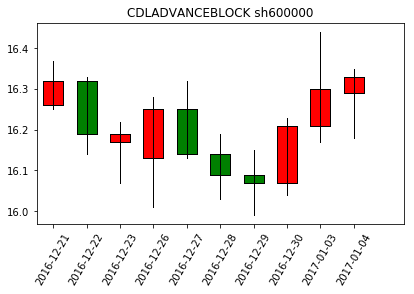

In [15]:
# 作图
index_num = pattern_df.index[-1]
candle_num = 10
df = df0.iloc[index_num-candle_num+1:index_num+1]
Functions.plot_candle_chart(df, pattern_name + ' ' + code1)

In [16]:
print pattern_name + '_' + code1

CDLADVANCEBLOCK_sh600000


## 在A股市场效果
遍历A股所有股票（包含退市），考察从上市至2017年1季度，所有出现

In [17]:
code_list = Functions.get_stock_code_list_in_one_dir('../talib_translate/data/input_data/stock_data/') # stock_data,test

In [18]:
# 遍历所有股票，并将模式函数下的所有股票信号点合并生产一个CSV数据文件
'''
此过程需要十多分钟……
'''
output = pd.DataFrame()
for code in code_list:
    
    # 导入数据
    df = Functions.import_stock_data(code)

    # 计算后复权价，计算指标要用复权价
    df[[i + '_后复权' for i in ['开盘价', '最高价', '最低价', '收盘价']]] = Functions.cal_fuquan_price(df)

    # 计算N天后涨跌幅
    for i in [1, 3, 5, 10]:
        df[str(i) + '天后涨跌幅'] = df['收盘价_后复权'].shift(-i) / df['收盘价_后复权'] - 1

    # 取2017年1季度之前的数据
    df = df[df['交易日期'] < pd.to_datetime('20170401')]
    if df.empty:
        continue

    # 计算技术指标。不同指标此处需要参数可能不同，需要修改。
    df[pattern_name] = getattr(talib, pattern_name)(df['开盘价_后复权'].values, df['最高价_后复权'].values,
                                                    df['最低价_后复权'].values, df['收盘价_后复权'].values)

    # 去除N天后涨跌幅为空的情况
    for i in [1, 3, 5, 10]:
        df = df[df[str(i)+'天后涨跌幅'].notnull()]

    # 合并数据
    output = output.append(df[df[pattern_name] != 0], ignore_index=True)

In [19]:
# 输出数据
output.to_csv(pattern_name + '.csv', index=False)

In [20]:
# 读取find_pattern_in_all_stock.py程序运行结果数据
df = pd.read_csv(pattern_name + '.csv')

In [21]:
df.iloc[:,[0,8,9,10,11,12,13,14,15,16]]

,交易日期,开盘价_后复权,最高价_后复权,最低价_后复权,收盘价_后复权,1天后涨跌幅,3天后涨跌幅,5天后涨跌幅,10天后涨跌幅,CDLADVANCEBLOCK
0,2001-01-11,20.431996,20.985573,20.431996,20.522582,-0.000981,-0.014223,0.007848,-0.025012,-100
1,2003-01-28,15.989458,16.324232,15.941633,16.212641,0.013766,0.002949,-0.003934,-0.021634,-100
2,2003-04-08,18.045916,18.412573,17.870558,18.125624,0.029024,0.044855,0.095866,0.067721,-100
3,2003-05-16,21.425529,22.142902,21.170464,21.584946,-0.021418,-0.040620,0.006647,-0.010340,-100
4,2004-01-07,18.326911,18.937808,18.262606,18.584131,0.006055,0.033736,-0.014706,0.009514,-100
...,...,...,...,...,...,...,...,...,...,...
62779,2017-02-15,45.479921,48.899915,45.309921,46.239919,-0.008867,-0.051038,-0.039792,0.006272,-100
62780,2017-02-27,44.989932,46.489930,44.599932,45.579931,0.019965,0.007020,0.031153,0.069987,-100
62781,2017-03-08,55.499984,57.969983,55.249984,56.319984,-0.020774,0.010298,0.159447,0.186256,-100
62782,2017-03-17,52.500012,55.190012,51.510012,52.990012,0.060200,0.060011,-0.001699,-0.171731,-100


In [24]:
# 展现统计结果
df.groupby(pattern_name)[[str(i)+'天后涨跌幅' for i in 1, 3, 5, 10]].describe().stack()

1天后涨跌幅        3天后涨跌幅        5天后涨跌幅       10天后涨跌幅
CDLADVANCEBLOCK                                                              
-100            count  62784.000000  62784.000000  62784.000000  62784.000000
                mean       0.000119      0.004523      0.006442      0.017072
                std        0.030498      0.054688      0.073876      0.115896
                min       -0.275208     -0.347059     -0.409694     -0.571264
                25%       -0.015102     -0.024431     -0.032573     -0.041165
                50%       -0.000794      0.001667      0.003052      0.010477
                75%        0.014002      0.029456      0.039598      0.066041
                max        0.415842      0.729107      4.678090      8.708289